### Integration of SVM and MVO 
The idea is to integrate support vector machines and mean variance optimization 

$$
\begin{align} 
\min_{x, z, w, b} \quad & x^{\intercal}\Sigma x + \frac{1}{2}||{w}||^2 &\\ 
\textrm{s.t.} \quad & \mu^\intercal x  \geq \bar{R} \\
\quad & x_i \leq z_i \quad &\forall i = 1,2,...,N \\
              \quad & y_i^{\intercal} w + b \leq M z_i - \epsilon \quad & \forall i = 1,2,...,N \\
              \quad & -M(1-z_i) + \epsilon \leq  y_i^{\intercal} w + b \quad &\forall i = 1,2,...,N \\
              \quad & x \in \mathcal{C} \quad z \in \{0,1\}^N & \\
\end{align} 
$$

In [ ]:
!sudo python -m pip install gurobipy==9.1.2
import gurobipy as gp
from gurobipy import GRB
from google.colab import drive 
drive.mount('/content/gdrive')
from math import sqrt
import math
import sys
pth = 'gdrive/My Drive/Colab Notebooks/'
sys.path.append(pth + 'SVM MVO/PYFILES/')
from packages import *
from svm_mvo import *
%matplotlib inline


## Import Forecasts
forecasts = pd.read_pickle(pth +'SVM MVO/DATA/Forecasts.pkl')
## Import Returns
rets = pd.read_pickle(pth + 'SVM MVO/DATA/RETS.pkl')
## Import feature vectors (after PCA transformation)
wrds_svm = pd.read_pickle(pth + 'SVM MVO/DATA/WRDS_PCA.pkl')

     |████████████████████████████████| 11.1 MB 7.4 MB/s 
Mounted at /content/gdrive
Restricted license - for non-production use only - expires 2022-01-13


In [ ]:
#read in licence info
gurobi_licence = pd.read_csv(pth +'SVM MVO/DATA/gurobi.csv')
print("Required info for Gurobi:", gurobi_licence.columns)
try:
  #web license try to access it via uoft
  e = gp.Env(empty=True)
  #e.setParam('OutputFlag', 0)
  e.setParam('WLSACCESSID', gurobi_licence.WLSACCESSID[0])
  e.setParam('LICENSEID', gurobi_licence.LICENSEID[0])
  e.setParam('WLSSECRET', gurobi_licence.WLSSECRET[0])
  e.start()
except: 
  !chmod 755 /content/gdrive/My\ Drive/Colab\ Notebooks/SVM\ MVO/gurobi/grbgetkey
  !/content/gdrive/My\ Drive/Colab\ Notebooks/SVM\ MVO/gurobi/grbgetkey {gurobi_licence.LOCAL[0]}
  e = gp.Env(empty=True)
  #chmod 755 grbgetkey
  e.start()


Changed value of parameter WLSACCESSID
Changed value of parameter LICENSEID
Changed value of parameter WLSSECRET
info  : grbgetkey version 9.1.2, build v9.1.1rc0-30-g8af970cb
info  : Contacting Gurobi license server...
info  : License file for license ID 726787 was successfully retrieved
info  : License expires at the end of the day on 2022-01-13
info  : Saving license file...

In which directory would you like to store the Gurobi license file?
[hit Enter to store it in /opt/gurobi]: 

info  : License 726787 written to file /opt/gurobi/gurobi.lic
Academic license - for non-commercial use only - expires 2022-01-13
Using license file /opt/gurobi/gurobi.lic


In [ ]:
mth = rets.index[0]
mth

Timestamp('2000-07-01 00:00:00')

In [ ]:
%run /content/gdrive/My\ Drive/Colab\ Notebooks/SVM\ MVO/PYFILES/svm_mvo.py

Academic license - for non-commercial use only - expires 2022-01-13
Using license file /opt/gurobi/gurobi.lic


In [ ]:
#preprocessing 
cov_, mean_ = forecasts[mth]
N = 150
cov = cov_[:N,:N]
mean = mean_[:N,:]
tics = list(rets.columns[:N])
print("valid tickers:", tics)
#get the wharton research data for the valid tickers for the month
wrds_tics = wrds_svm[wrds_svm.index.get_level_values('tic').isin(tics)].xs(mth, level="MonthStart")
#restrict the wharton research data to the columns of interest
Y = wrds_tics # Y matrix in formulation 
Y_ =  (Y - Y.mean(axis=0))/(Y.std(axis=0))
# Y_ = Y_.iloc[:,:]
#Y_ = Y_[['ROC1', 'INV1', 'PRO1', 'GRW1', 'LEV1', 'LIQ1']]
# Y_ = Y_[['GRW3', 'GRW1']]
AssetLim = math.floor(N*0.9)
ret_constr = -1
soft_margin = 1000

valid tickers: ['AAPL', 'ABC', 'ABMD', 'ABT', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AJG', 'AKAM', 'ALB', 'ALK', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMT', 'AMZN', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'ATO', 'AVY', 'AZO', 'BA', 'BAX', 'BBY', 'BDX', 'BKNG', 'BLL', 'BMY', 'BSX', 'BWA', 'CAG', 'CAH', 'CAT', 'CCI', 'CCL', 'CDNS', 'CERN', 'CHD', 'CHRW', 'CI', 'CL', 'CLX', 'CMCSA', 'CMI', 'CMS', 'CNP', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CSCO', 'CSX', 'CTAS', 'CTSH', 'CTXS', 'CVS', 'CVX', 'D', 'DD', 'DGX', 'DHR', 'DIS', 'DISH', 'DLTR', 'DOV', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'ES', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD', 'F', 'FAST', 'FCX', 'FDX', 'FE', 'FFIV', 'FISV', 'FLS', 'FMC', 'GD', 'GIS', 'GLW', 'GPC', 'GPS', 'GWW', 'HAL', 'HAS', 'HD', 'HES', 'HFC', 'HOG', 'HOLX', 'HON', 'HP', 'HPQ', 'HRB', 'HRL', 'HSIC', 'HSY', 'HUM', 'IBM', 'IDXX', 'IEX', 'IFF', 'INCY', 'INTC', 'INTU', 'IP', 'IPG', 'IRM', 

In [ ]:
print(wrds_svm.columns[(wrds_svm == np.inf).any(axis = 0).values])

Int64Index([], dtype='int64')


### Simple Min Variance Portfolio 

In [ ]:
MVO = SVMMVO(tics, mean, cov, ret_constr, soft_margin, Y_, AssetLim,\
             svm_choice = (False, False), print_var_frntr= False) #define an instance of the class
MVO.set_model() #set up the model
MVO.optimize() #find optimal solution

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 2 rows, 300 columns and 300 nonzeros
Model fingerprint: 0x014b9800
Model has 11325 quadratic objective terms
Coefficient statistics:
  Matrix range     [5e-04, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-06, 5e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 0 rows and 150 columns
Presolve time: 0.02s
Presolved: 2 rows, 150 columns, 300 nonzeros
Presolved model has 11325 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 149
 AA' NZ     : 1.132e+04
 Factor NZ  : 1.148e+04
 Factor Ops : 1.159e+06 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.22268032e+05 -2.22268032e+05  8.88e+04 1.24e-05  1.00e+06     0s


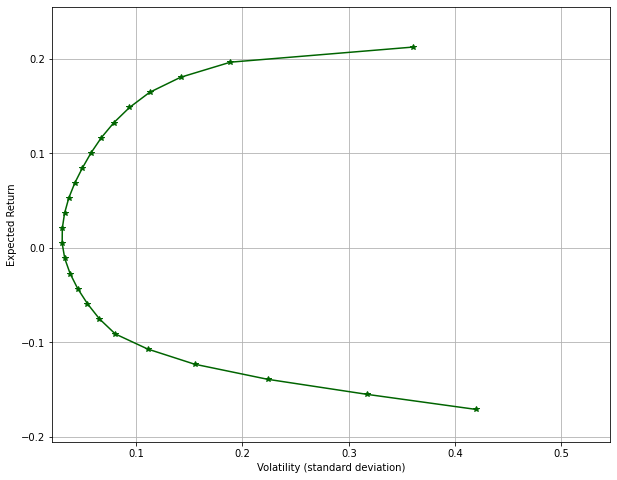

In [ ]:
MVO.model.setParam('OutputFlag', 0)
MVO_frontier, ws, xis = MVO.get_frontier(); #ws and xi are not important here

### Mean Variance and SVM Joint Formulation

In [ ]:
SVM_MVO = SVMMVO(tics, mean, cov, ret_constr, soft_margin, Y_, AssetLim, \
                 svm_choice = (True, False), print_var_frntr = False )
SVM_MVO.set_model()
SVM_MVO.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 603 rows, 458 columns and 3750 nonzeros
Model fingerprint: 0xb52a33cf
Model has 11332 quadratic objective terms
Variable types: 308 continuous, 150 integer (150 binary)
Coefficient statistics:
  Matrix range     [5e-04, 1e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-06, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-02, 1e+02]
Found heuristic solution: objective 0.0346771
Presolve removed 3 rows and 151 columns
Presolve time: 0.01s
Presolved: 600 rows, 307 columns, 3593 nonzeros
Presolved model has 11332 quadratic objective terms
Variable types: 158 continuous, 149 integer (149 binary)

Root relaxation: objective 9.171821e-04, 546 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node T

In [ ]:
SVM_MVO.z.x

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

In [ ]:
SVM_MVO.get_frontier()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 603 rows, 458 columns and 3750 nonzeros
Model fingerprint: 0xa5546449
Model has 11332 quadratic objective terms
Variable types: 308 continuous, 150 integer (150 binary)
Coefficient statistics:
  Matrix range     [5e-04, 1e+04]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-06, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-02, 1e+02]

MIP start from previous solve did not produce a new incumbent solution

Presolve removed 2 rows and 151 columns
Presolve time: 0.01s

Explored 0 nodes (0 simplex iterations) in 0.06 seconds
Thread count was 1 (of 2 available processors)

Solution count 0

Model is infeasible or unbounded
Best objective -, best bound -, gap -
Resolving Model to initial state (return target) then exiting
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 l

(None, None, None)

### There must be a model that is guaranteed to be feasible. Slack variables for the big M constraints will be introduced and penalized

$$
\begin{align} 
\min_{x, z, w, b} \quad & x^{\intercal}\Sigma x + \frac{1}{2}||{w}||^2 + \sum_{i=1}^N g(\xi_i)&\\ 
\textrm{s.t.} \quad & \mu^\intercal x  \geq \bar{R} \\
\quad & x_i \leq z_i \quad &\forall i = 1,2,...,N \\
              \quad & y_i^{\intercal} w + b \leq M z_i - \epsilon + \xi_i \quad & \forall i = 1,2,...,N \\
              \quad & -M(1-z_i) + \epsilon - \xi_i \leq  y_i^{\intercal} w + b \quad &\forall i = 1,2,...,N \\
              \quad & x \in \mathcal{C} \quad z \in \{0,1\}^N  \quad \xi \geq 0& \\
\end{align} 
$$

This model is always feasible. A common setting for g is $C \xi/N$ where $C$ is a hyperparameter. 

In [ ]:
SVM_MVO_Slck = SVMMVO(tics, mean, cov, ret_constr, soft_margin, Y_, AssetLim, \
                      svm_choice = (True, True), print_var_frntr = True )
SVM_MVO_Slck.set_model()
SVM_MVO_Slck.optimize()

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 603 rows, 608 columns and 4050 nonzeros
Model fingerprint: 0x7d1e2bcd
Model has 11332 quadratic objective terms
Variable types: 458 continuous, 150 integer (150 binary)
Coefficient statistics:
  Matrix range     [5e-04, 1e+04]
  Objective range  [7e+00, 7e+00]
  QObjective range [1e-06, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-02, 1e+02]
Found heuristic solution: objective 2.000000e+12
Presolve removed 1 rows and 150 columns
Presolve time: 0.01s
Presolved: 602 rows, 458 columns, 3899 nonzeros
Presolved model has 11332 quadratic objective terms
Variable types: 308 continuous, 150 integer (150 binary)

Root relaxation: objective 9.171821e-04, 374 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Nod

In [ ]:
SVM_MVO_Slck.xi.x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

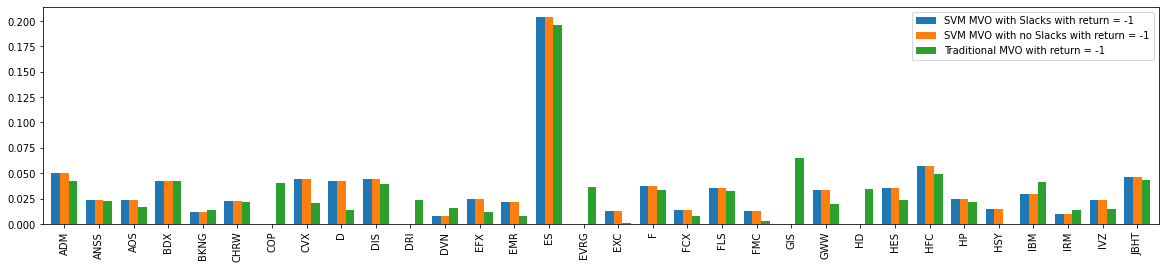

In [ ]:
#portfolio comparison
out = pd.concat([SVM_MVO_Slck.get_results(), SVM_MVO.get_results(), MVO.get_results()], axis = 0)
out[out.columns[(out > 0.01).any(axis = 0)]].transpose()[:-2].plot.bar(figsize = (20,4), width = 0.75);

In [ ]:
SVM_MVO_Slck.xi.x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

return -0.17088411817894
x [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
w [0.         0.00030014 0.00263752 0.00233512 0.00349373 0.00025971
 0.00305443]
z [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  1. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -

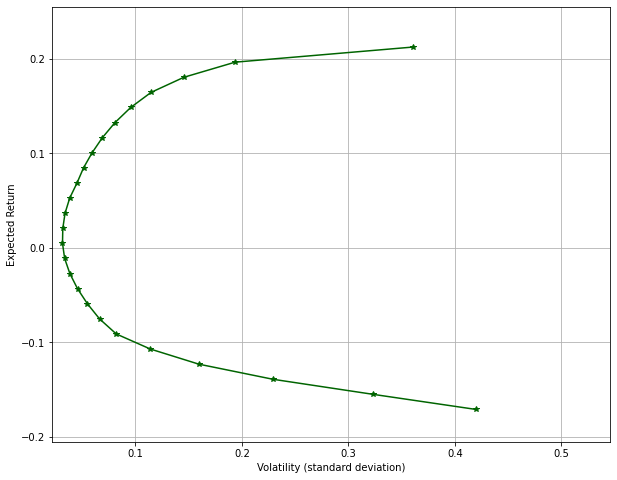

In [ ]:
SVM_MVO_Slck.model.setParam('OutputFlag', 0)
SVMV_Slck_EF, ws, xis = SVM_MVO_Slck.get_frontier()

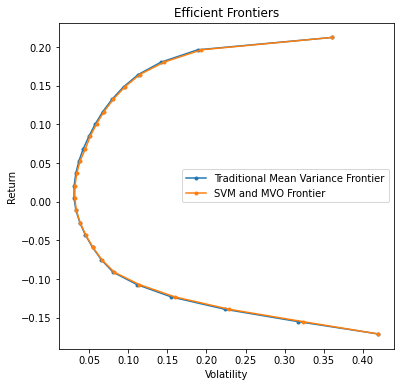

In [ ]:
#Plot efficient frontiers for the SVM MVO an Vanilla MVO
plt.figure(figsize = (6,6))
plt.plot(MVO_frontier[0], MVO_frontier[1], ".-", label = "Traditional Mean Variance Frontier");
plt.plot(SVMV_Slck_EF[0], SVMV_Slck_EF[1], ".-", label = "SVM and MVO Frontier");
plt.legend();
plt.ylabel('Return')
plt.xlabel('Volatility')
plt.legend()
plt.title("Efficient Frontiers");

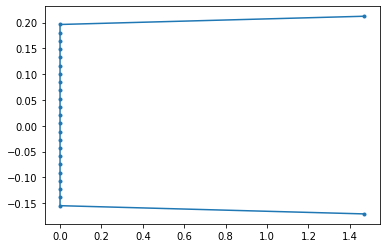

In [ ]:
plt.plot(xis.sum(axis= 1), SVMV_Slck_EF[1], ".-", label = "Slacks for each target");

In [ ]:
ws.shape

(25, 8)

In [ ]:
supports  = pd.DataFrame(ws)
supports['ret'] = SVMV_Slck_EF[1,:]
big_m = 10**(6)
supports_uniq = supports.groupby([np.ceil(supports[0] * big_m) /big_m,  \
                  np.ceil(supports[1] * big_m) / big_m, \
                  np.ceil(supports[2] * big_m) / big_m, \
                  np.ceil(supports[3] * big_m) / big_m, \
                  np.ceil(supports[4] * big_m) / big_m, \
                  np.ceil(supports[5] * big_m) / big_m, \
                  np.ceil(supports[6] * big_m) / big_m, \
                  np.ceil(supports[7] * big_m) / big_m]).first()
                  # np.ceil(supports[8] * big_m) / big_m, \
                  # np.ceil(supports[9] * big_m) / big_m, \
                  # np.ceil(supports[10] * big_m) / big_m, \
                  # np.ceil(supports[11] * big_m) / big_m, \
                  # np.ceil(supports[12] * big_m) / big_m] \
supports_uniq['last_ret'] = supports.groupby([np.ceil(supports[0] * big_m) /big_m,  \
                  np.ceil(supports[1] * big_m) / big_m, \
                  np.ceil(supports[2] * big_m) / big_m, \
                  np.ceil(supports[3] * big_m) / big_m, \
                  np.ceil(supports[4] * big_m) / big_m, \
                  np.ceil(supports[5] * big_m) / big_m, \
                  np.ceil(supports[6] * big_m) / big_m, \
                  np.ceil(supports[7] * big_m) / big_m]).last()['ret']
                  # np.ceil(supports[8] * big_m) / big_m, \
                  # np.ceil(supports[9] * big_m) / big_m, \
                  # np.ceil(supports[10] * big_m) / big_m, \
                  # np.ceil(supports[11] * big_m) / big_m, \
                  # np.ceil(supports[12] * big_m) / big_m] \
                  
supports_uniq['desc'] = "Return Target : " +  np.round(supports_uniq['ret'], decimals = 2).astype(str) \
                      +  " to " + np.round(supports_uniq['last_ret'], decimals = 2).astype(str) 

for idx in supports_uniq.index:
  if supports_uniq.loc[idx,'last_ret'] == supports_uniq.loc[idx,'ret']:
    supports_uniq.loc[idx, 'desc'] = "Return Target : " + \
                                      np.round(supports_uniq.loc[idx,'ret'], decimals = 2).astype(str)
supports_uniq

0  ...                           desc
0        1        2        3        4        5        6        7                   ...                               
0.000000 0.000175 0.000654 0.003700 0.005274 0.000000 0.000767 0.000000  0.000000  ...           Return Target : 0.21
         0.000301 0.002638 0.002336 0.003494 0.000260 0.003055 0.000000  0.000000  ...          Return Target : -0.17
         0.018336 0.017578 0.010246 0.018586 0.014908 0.022191 0.055423  0.000000  ...           Return Target : 0.18
0.002321 0.016607 0.021906 0.004713 0.017529 0.011933 0.023048 0.054674  0.002321  ...    Return Target : 0.1 to 0.13
0.002608 0.016559 0.022233 0.005567 0.017309 0.012757 0.022933 0.055536  0.002608  ...   Return Target : 0.08 to 0.16
0.005262 0.000000 0.000000 0.022261 0.003263 0.022167 0.022896 0.054477  0.005262  ...  Return Target : -0.12 to 0.07
0.022050 0.018365 0.024836 0.022730 0.025614 0.013508 0.000463 0.002192  0.022049  ...            Return Target : 0.2
0.028484 0.040653 0.000432 0.003320 0.011911 0.026940 0.021905 0.025704  0.028484  ...          Return Target : -0.14
0.033285 0.033077 0.000000 0.000000 0.002864 0.034173 0.032910 0.018610  0.033284  ...          Return Target : -0.15

[9 rows x 11 columns]

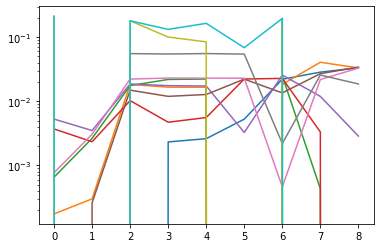

In [ ]:
supports_uniq.index = range(len(supports_uniq))
(supports_uniq.iloc[:,:-1]).plot(legend = False, logy = True);